In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [12]:
# 1. Exploring the Dataset
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/insurance.csv')

In [13]:
# Display the first few rows of the DataFrame
print("Original DataFrame:")
print(df.head())

Original DataFrame:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [14]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [15]:
# Display data types and non-null counts
print("\nData Types and Non-Null Counts:")
print(df.info())


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [19]:
# 2. Converting Categorical Values to Numerical
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to all categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column + '_Encoded'] = label_encoder.fit_transform(df[column])

# Drop the original categorical columns
df.drop(categorical_columns, axis=1, inplace=True)

# Display the DataFrame after preprocessing
print("\nDataFrame after preprocessing:")
print(df.head())


DataFrame after preprocessing:
   age     bmi  children      charges  sex_Encoded  smoker_Encoded  \
0   19  27.900         0  16884.92400            0               1   
1   18  33.770         1   1725.55230            1               0   
2   28  33.000         3   4449.46200            1               0   
3   33  22.705         0  21984.47061            1               0   
4   32  28.880         0   3866.85520            1               0   

   region_Encoded  
0               3  
1               2  
2               2  
3               1  
4               1  


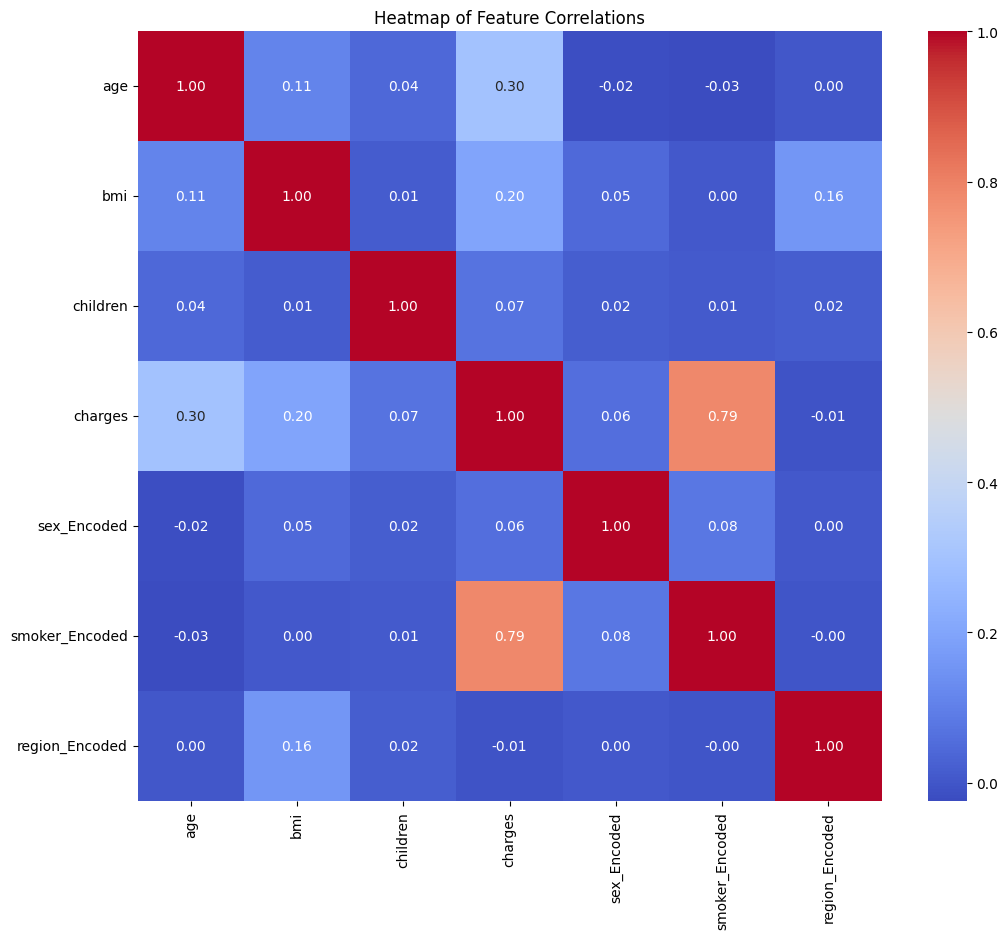

In [22]:
# 3. Plotting Heatmap to See Dependency of Dependent Variable on Independent Features
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

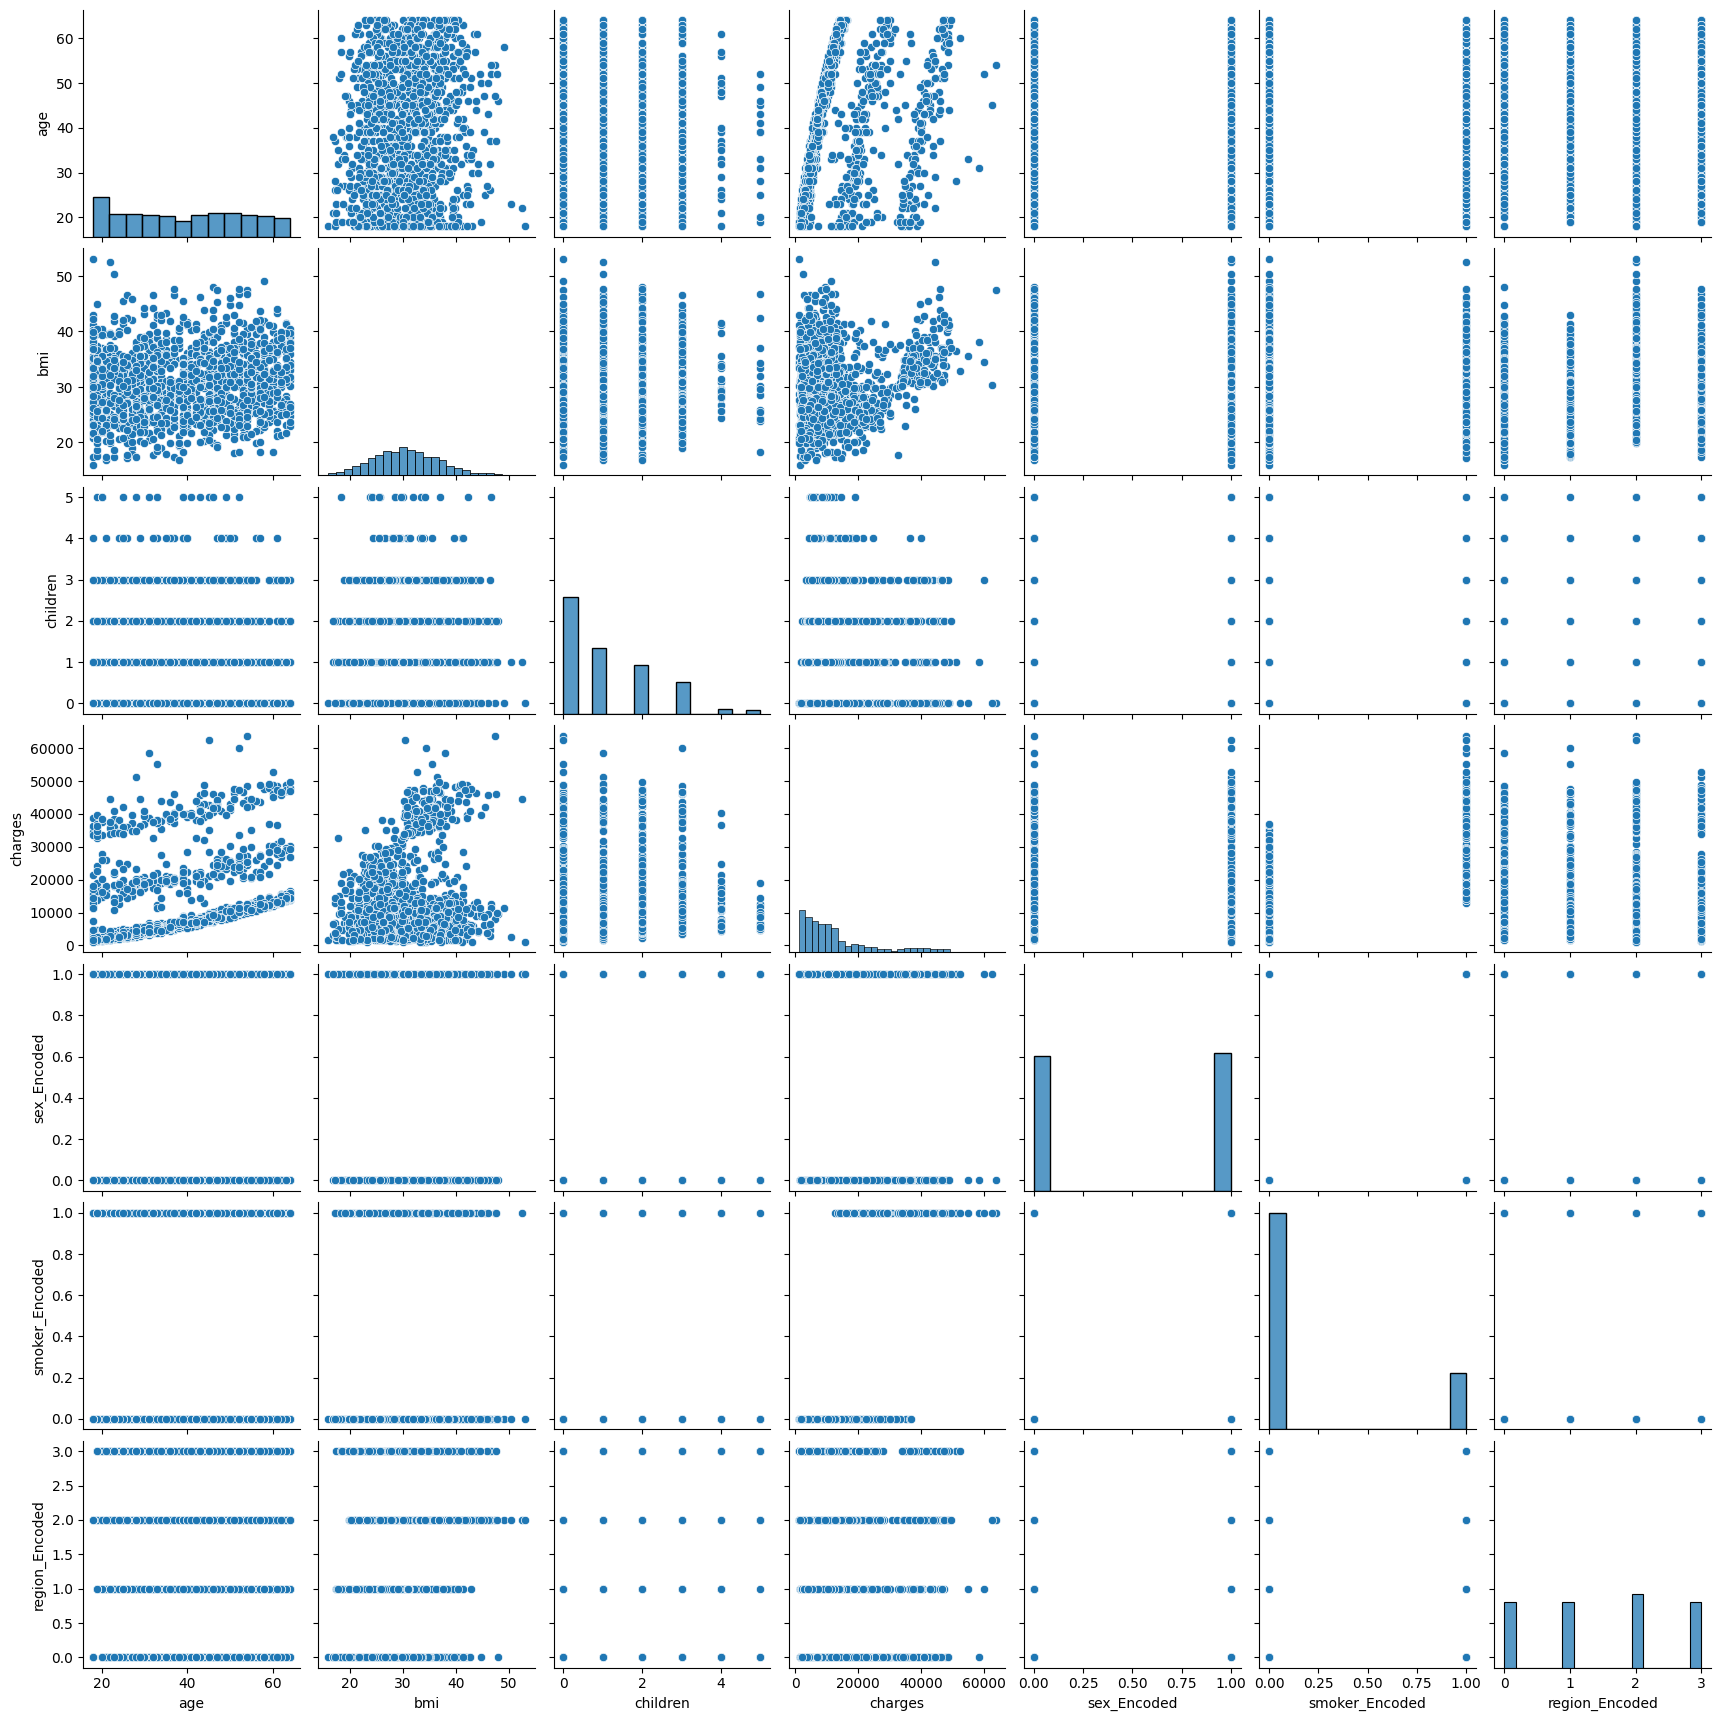

In [23]:
# 4. Data Visualization (Plots of Feature vs Feature)
# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

In [27]:
# 5. Plotting Skew and Kurtosis
# Calculate skewness and kurtosis for each feature
for column in df.columns:
    print(f'{column}: Skewness = {df[column].skew()}, Kurtosis = {df[column].kurt()}')

age: Skewness = 0.05567251565299186, Kurtosis = -1.2450876526418673
bmi: Skewness = 0.2840471105987448, Kurtosis = -0.05073153135467834
children: Skewness = 0.9383804401702414, Kurtosis = 0.2024541467168901
charges: Skewness = 1.5158796580240388, Kurtosis = 1.6062986532967907
sex_Encoded: Skewness = -0.02095139743334541, Kurtosis = -2.0025566364991754
smoker_Encoded: Skewness = 1.4647661601953743, Kurtosis = 0.1457555390520402
region_Encoded: Skewness = -0.038100508026419524, Kurtosis = -1.3277019498126457


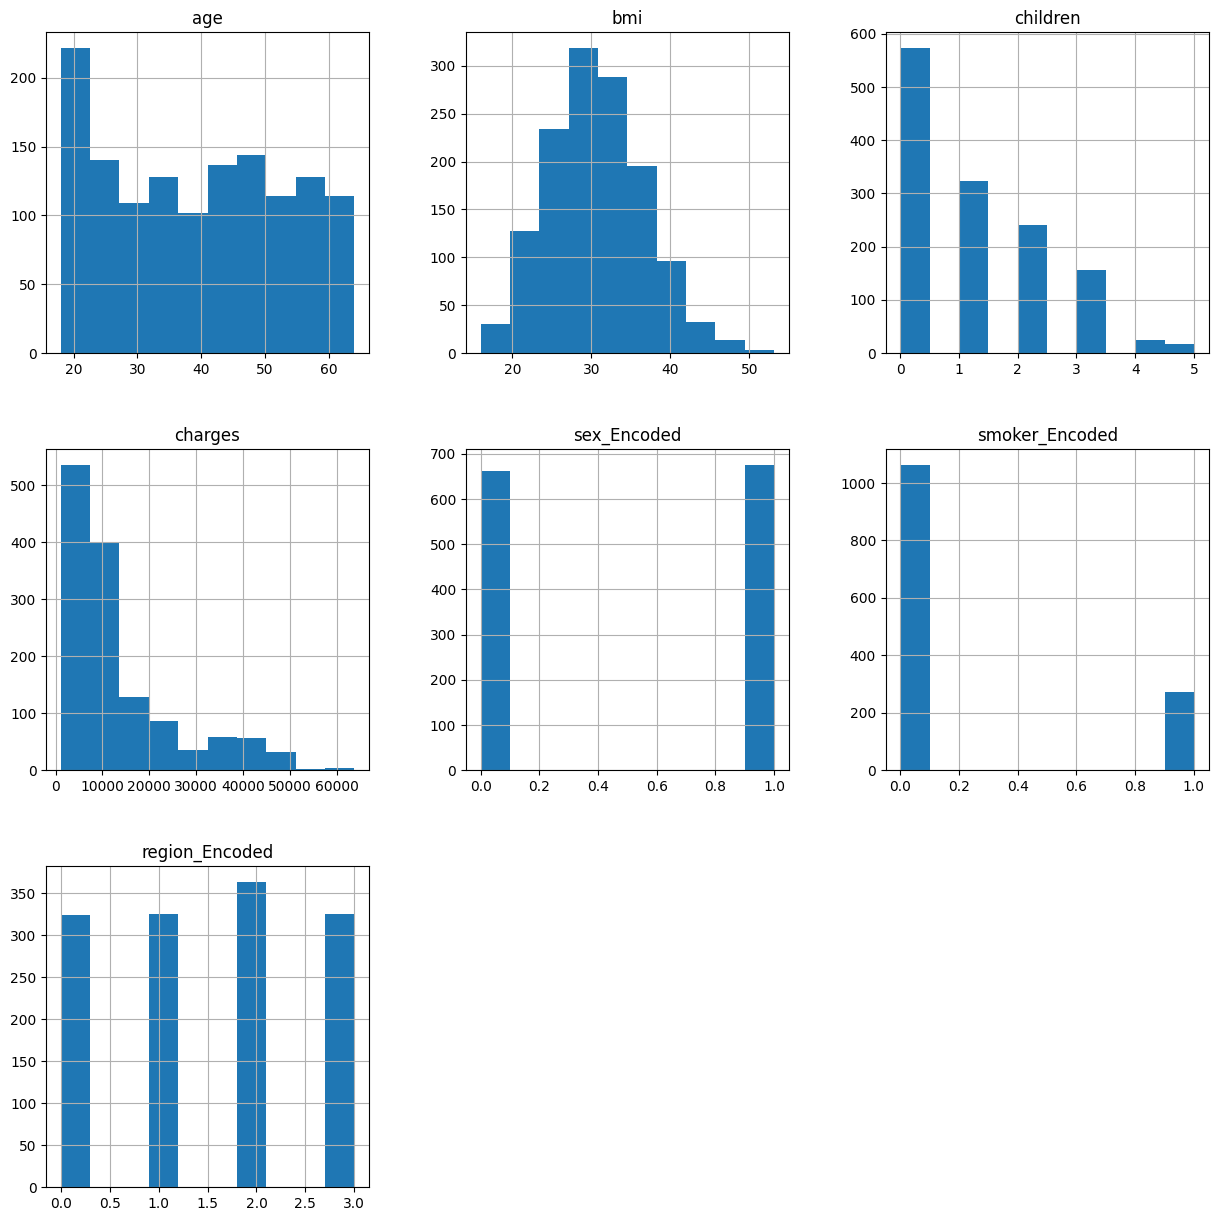

In [28]:
# Plot histograms for each feature
df.hist(figsize=(15, 15))
plt.show()

In [31]:
# 6. Data Preparation
# Define the target variable and features
target = 'age'  # Replace with your target column
X = df.drop(columns=[target])
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# 7. Prediction using Linear Regression
# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression: MSE = {mse_lr}, R2 = {r2_lr}')


Linear Regression: MSE = 142.2257263048883, R2 = 0.26786147807353056


In [36]:
# 8. Prediction using SVR
# Train the model
svr = SVR()
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR: MSE = {mse_svr}, R2 = {r2_svr}')

SVR: MSE = 88.70168045042765, R2 = 0.5433883945991981


In [39]:
# 9. Prediction using Ridge Regressor
# Train the model
ridge = Ridge()
ridge.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression: MSE = {mse_ridge}, R2 = {r2_ridge}')

Ridge Regression: MSE = 142.20499202602298, R2 = 0.26796821238015756


In [42]:
# 10. Prediction using Random Forest Regressor
# Train the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regressor: MSE = {mse_rf}, R2 = {r2_rf}')

Random Forest Regressor: MSE = 27.851318283582096, R2 = 0.856629151900878


In [44]:
# 11. Performing Hyperparameter Tuning for the Models
# Hyperparameter Tuning using Grid Search for Random Forest Regressor
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params_rf = grid_search.best_params_
best_score_rf = grid_search.best_score_
print(f'Best Parameters for Random Forest: {best_params_rf}')
print(f'Best CV Score for Random Forest: {best_score_rf}')

# Evaluate the tuned model
y_pred_rf_tuned = grid_search.predict(X_test)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
print(f'Tuned Random Forest Regressor: MSE = {mse_rf_tuned}, R2 = {r2_rf_tuned}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score for Random Forest: 0.8010812195635556
Tuned Random Forest Regressor: MSE = 26.81370752169976, R2 = 0.8619704838052833


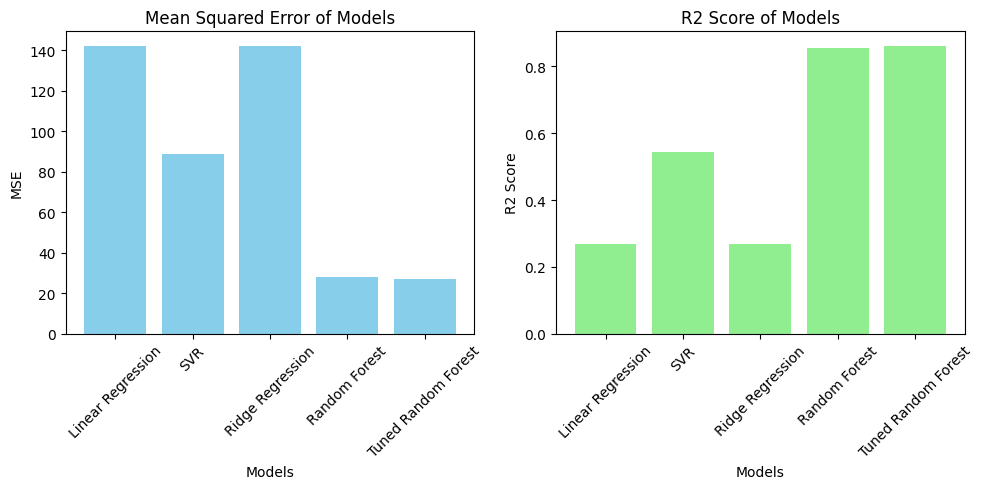

In [46]:
# 12. Plotting Graph for All Models to Compare Performance
# Model names and performance metrics
model_names = ['Linear Regression', 'SVR', 'Ridge Regression', 'Random Forest', 'Tuned Random Forest']
mse_values = [mse_lr, mse_svr, mse_ridge, mse_rf, mse_rf_tuned]
r2_values = [r2_lr, r2_svr, r2_ridge, r2_rf, r2_rf_tuned]

# Plotting MSE values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error of Models')
plt.xticks(rotation=45)

# Plotting R2 values
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score of Models')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()